# Випадкові процеси: Лабораторна робота №1


Генеруємо мільйон точок за рівномірним розподілом та малюємо графік

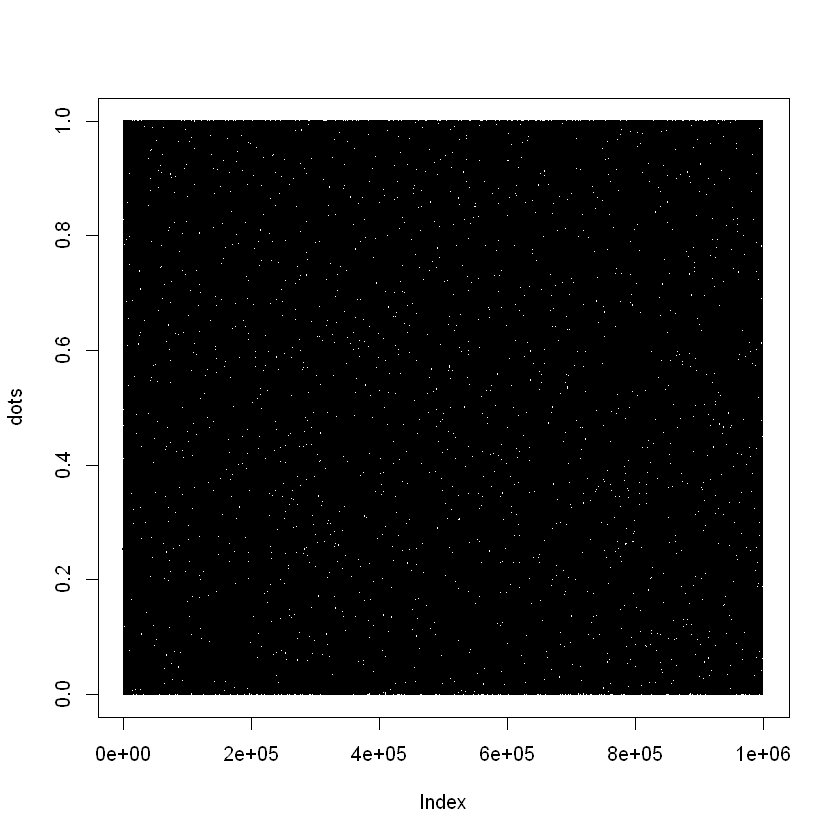

In [37]:
n <- 1000000
dots <- runif(n)
# The size of graph field
#par(mar=c(3, 3, 3, 3))
plot(dots, pch = 1, cex = 0.01 )

Обраховуємо математичне сподівання, дисперсію та кількість інтервалів нашої вибірки.

In [38]:
# Calculating Expected value, variance and number of intervals

expected_value <- sum(dots/n)
cat('Expected value ', expected_value,"\n")
variance <- sum(dots^2)/n - expected_value^2
cat('Variance: ',variance,"\n")
h <-1/(1+3.322*log10(n))
cat("Interval length: ",h,"\n")
nint <- round(1/h)
cat('Number of intervals: ', nint,"\n")


Expected value  0.4999021 
Variance:  0.08332602 
Interval length:  0.04777374 
Number of intervals:  21 


In [39]:
# Creating intervals, calculaving frequensy
bounders <- c(seq(0, 1, h),1)
l <- as.numeric(length(bounders))-1
freq <- c()
for (i in 1:l){
  suB <- 0
  for (k in dots){
    if(k>=bounders[i] && k<bounders[i+1]){
      suB <- suB+1}}
  freq <- c(freq,suB)
}
cat(bounders)

0 0.04777374 0.09554749 0.1433212 0.191095 0.2388687 0.2866425 0.3344162 0.3821899 0.4299637 0.4777374 0.5255112 0.5732849 0.6210587 0.6688324 0.7166062 0.7643799 0.8121536 0.8599274 0.9077011 0.9554749 1

Тепер формуємо таблицю для наочності 

In [40]:
# Creating intervals and making a table

intervals <-c()
for (i in 1:l){
  temp <- paste('[',as.character(round(bounders[i],digits=5)),',',as.character(round(bounders[i+1],digits=5)),')')
  intervals <- c(intervals,temp)
}
frec_comp <- freq/n
table <- cbind("|",intervals, "|",round(freq,digits=5),"|",round(frec_comp,digits=5),"|")
print(table, quote=FALSE )

        intervals                                
 [1,] | [ 0 , 0.04777 )       | 47995 | 0.048   |
 [2,] | [ 0.04777 , 0.09555 ) | 47851 | 0.04785 |
 [3,] | [ 0.09555 , 0.14332 ) | 47369 | 0.04737 |
 [4,] | [ 0.14332 , 0.19109 ) | 47939 | 0.04794 |
 [5,] | [ 0.19109 , 0.23887 ) | 48028 | 0.04803 |
 [6,] | [ 0.23887 , 0.28664 ) | 47762 | 0.04776 |
 [7,] | [ 0.28664 , 0.33442 ) | 47866 | 0.04787 |
 [8,] | [ 0.33442 , 0.38219 ) | 47371 | 0.04737 |
 [9,] | [ 0.38219 , 0.42996 ) | 47665 | 0.04766 |
[10,] | [ 0.42996 , 0.47774 ) | 47508 | 0.04751 |
[11,] | [ 0.47774 , 0.52551 ) | 48151 | 0.04815 |
[12,] | [ 0.52551 , 0.57328 ) | 47710 | 0.04771 |
[13,] | [ 0.57328 , 0.62106 ) | 47750 | 0.04775 |
[14,] | [ 0.62106 , 0.66883 ) | 48034 | 0.04803 |
[15,] | [ 0.66883 , 0.71661 ) | 47749 | 0.04775 |
[16,] | [ 0.71661 , 0.76438 ) | 47690 | 0.04769 |
[17,] | [ 0.76438 , 0.81215 ) | 48030 | 0.04803 |
[18,] | [ 0.81215 , 0.85993 ) | 47849 | 0.04785 |
[19,] | [ 0.85993 , 0.9077 )  | 47706 | 0.04771 |


Будуємо за поданими даними гістограму

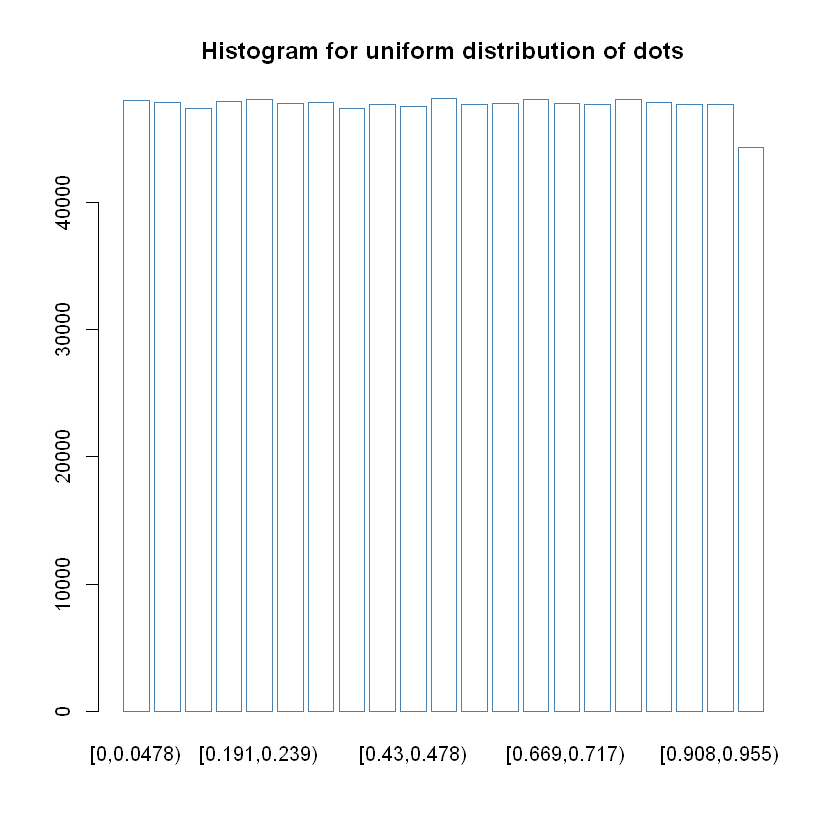

In [41]:
# Building a histogram
library(ggplot2)
fhist <- cut(dots,bounders, right=FALSE)
barplot(table(fhist),main="Histogram for uniform distribution of dots", col = "white", border = "steelblue" )

## 1.3 - перевірка гіпотези про рівномірний розподіл


будемо використовувати критерій Пірсона
спочатку обрахуємо середньоарифметичне кожного з інтервалів

In [42]:
# hyposesys testing for unified distribution
evgper <- c()
for (i in 1:l){
  avg <- (bounders[i]+bounders[i+1])/2
  evgper <- c(evgper,avg)
}
cat(evgper)

0.02388687 0.07166062 0.1194344 0.1672081 0.2149818 0.2627556 0.3105293 0.3583031 0.4060768 0.4538506 0.5016243 0.5493981 0.5971718 0.6449455 0.6927193 0.740493 0.7882668 0.8360405 0.8838143 0.931588 0.9777374

виводимо таблицю середнього значення по інтервалу та частоту попадання у цей інтервал

In [43]:
table1 <- print(cbind(intervals,"|",round(evgper,digits=5),"|",round(freq,digits=5)), quote = FALSE)

      intervals                              
 [1,] [ 0 , 0.04777 )       | 0.02389 | 47995
 [2,] [ 0.04777 , 0.09555 ) | 0.07166 | 47851
 [3,] [ 0.09555 , 0.14332 ) | 0.11943 | 47369
 [4,] [ 0.14332 , 0.19109 ) | 0.16721 | 47939
 [5,] [ 0.19109 , 0.23887 ) | 0.21498 | 48028
 [6,] [ 0.23887 , 0.28664 ) | 0.26276 | 47762
 [7,] [ 0.28664 , 0.33442 ) | 0.31053 | 47866
 [8,] [ 0.33442 , 0.38219 ) | 0.3583  | 47371
 [9,] [ 0.38219 , 0.42996 ) | 0.40608 | 47665
[10,] [ 0.42996 , 0.47774 ) | 0.45385 | 47508
[11,] [ 0.47774 , 0.52551 ) | 0.50162 | 48151
[12,] [ 0.52551 , 0.57328 ) | 0.5494  | 47710
[13,] [ 0.57328 , 0.62106 ) | 0.59717 | 47750
[14,] [ 0.62106 , 0.66883 ) | 0.64495 | 48034
[15,] [ 0.66883 , 0.71661 ) | 0.69272 | 47749
[16,] [ 0.71661 , 0.76438 ) | 0.74049 | 47690
[17,] [ 0.76438 , 0.81215 ) | 0.78827 | 48030
[18,] [ 0.81215 , 0.85993 ) | 0.83604 | 47849
[19,] [ 0.85993 , 0.9077 )  | 0.88381 | 47706
[20,] [ 0.9077 , 0.95547 )  | 0.93159 | 47645
[21,] [ 0.95547 , 1 )       | 0.97

Обчислюємо середьоквадратичне відхилення, вибіркове середнє нам вже відомо


In [44]:
standart_deviation <- sqrt(sum((dots-expected_value)^2)/(n-1))
cat("Expected value: ", expected_value,"\n")
cat("Standart deviation",standart_deviation,"\n")

Expected value:  0.4999021 
Standart deviation 0.2886626 


Знаходимо оцінку параметрів a,b - кінців інтервалу та щільність гіпотетичного рівномірного розподілу

In [45]:
adot <- expected_value - sqrt(3)*standart_deviation
bdot <- expected_value + sqrt(3)*standart_deviation
fx <- 1/(bdot-adot)

cat("Hypotetic frequensy of unified distribution", fx, "\n")



Hypotetic frequensy of unified distribution 1.000043 


Знаходимо теоретичні частоти, щоб потім використати критерій Пірсона. У ході коду ми отримуємо $$\chi^2$$ спостережувальне.

In [46]:
n1 <- n*fx*(-adot+bounders[2] )
nl <- n*fx*(bdot - bounders[l])
nth <- c(n1)
for (i in 3:(l)){
  ni <- n*(bounders[i]-bounders[i-1])*fx
  nth <-c(nth,ni)
}
nth <- c(nth,nl)
cat(nth)
forHiSpos <- c()
for (i in 1:l){
  calc <- ((freq[i]-nth[i])^2)/nth[i]
  forHiSpos <- c(forHiSpos,calc)
}
print(freq)

47852.01 47775.81 47775.81 47775.81 47775.81 47775.81 47775.81 47775.81 47775.81 47775.81 47775.81 47775.81 47775.81 47775.81 47775.81 47775.81 47775.81 47775.81 47775.81 47775.81 44407.51 [1] 47995 47851 47369 47939 48028 47762 47866 47371 47665 47508 48151 47710
[13] 47750 48034 47749 47690 48030 47849 47706 47645 44332


Використовуємо критерій Пірсона при k=кількість інтервалів - 3 та зводимо усі дані до таблиці. Знаходимо хі квадрат спостережувальне та критичне.

Хі критичне взяте при рівні значущості 0.05 - введено вручну, тому для n відміннне від мільйона треба зазначати інше критичне значення. Подивитися 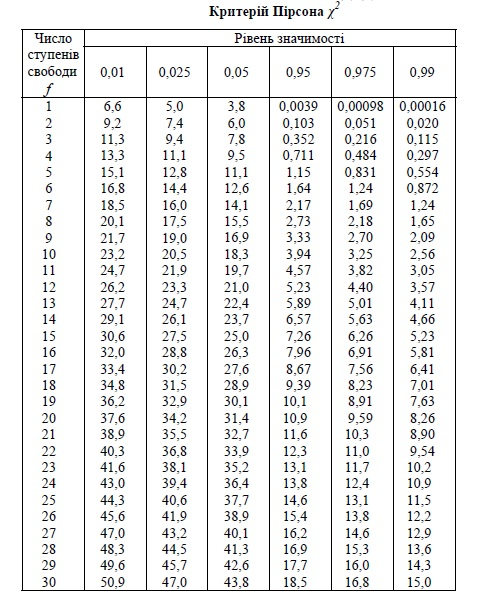

In [47]:

table2 <- cbind(intervals,"|",round(evgper,digits = 5),"|",round(nth, digits= 5),"|",round(forHiSpos, digits = 5),"|")
print(table2, quote = FALSE)
 
HiSQRTspos <- sum(forHiSpos)
HiCrit <- 28.9
cat("Chi critical: ",HiCrit,"\nChi observed: ", HiSQRTspos)

      intervals                                                
 [1,] [ 0 , 0.04777 )       | 0.02389 | 47852.00941 | 0.42728 |
 [2,] [ 0.04777 , 0.09555 ) | 0.07166 | 47775.81474 | 0.11832 |
 [3,] [ 0.09555 , 0.14332 ) | 0.11943 | 47775.81474 | 3.46406 |
 [4,] [ 0.14332 , 0.19109 ) | 0.16721 | 47775.81474 | 0.55738 |
 [5,] [ 0.19109 , 0.23887 ) | 0.21498 | 47775.81474 | 1.33116 |
 [6,] [ 0.23887 , 0.28664 ) | 0.26276 | 47775.81474 | 0.00399 |
 [7,] [ 0.28664 , 0.33442 ) | 0.31053 | 47775.81474 | 0.17024 |
 [8,] [ 0.33442 , 0.38219 ) | 0.3583  | 47775.81474 | 3.43008 |
 [9,] [ 0.38219 , 0.42996 ) | 0.40608 | 47775.81474 | 0.25703 |
[10,] [ 0.42996 , 0.47774 ) | 0.45385 | 47775.81474 | 1.50128 |
[11,] [ 0.47774 , 0.52551 ) | 0.50162 | 47775.81474 | 2.94634 |
[12,] [ 0.52551 , 0.57328 ) | 0.5494  | 47775.81474 | 0.09066 |
[13,] [ 0.57328 , 0.62106 ) | 0.59717 | 47775.81474 | 0.01395 |
[14,] [ 0.62106 , 0.66883 ) | 0.64495 | 47775.81474 | 1.39526 |
[15,] [ 0.66883 , 0.71661 ) | 0.69272 | 

І нарешті перевіряємо чи гіпотеза є правильною: якщо спостережувальне значення менше за критичне - гіпотеза підтверджується.

In [48]:
if (HiSQRTspos<HiCrit){
  cat("Hyposesys about unified distribution IS TRUE")
}else{cat("That`s not unified distribution")}

Hyposesys about unified distribution IS TRUE

## 1.4 Дослідити розподіл випадкової величини

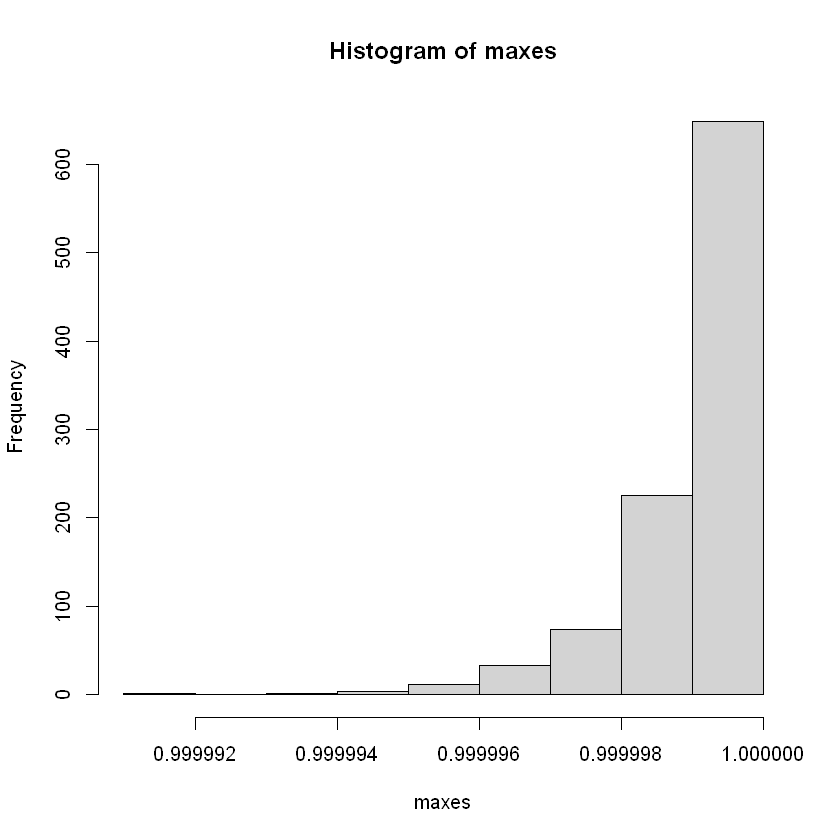

In [49]:

maxes <- c()
m <- 1000
for (i in 1:m){
  tempmax <- as.numeric(max(runif(n)))
  maxes <- c(maxes,tempmax)
}
hist(maxes)

# 2. Змоделювати дискретну випадкову величину, задану таблицею 2, побудувати графік.

2.1Оцінити математичне сподівання та дисперсію отриманої дискретної
випадкової величини.

In [50]:
#2.0 
xi42 <- c(1,10,15,23,29,38,42)
pi42 <- c(0.02, 0.05,0.1, 0.28, 0.23, 0.22,0.1)

table21 <- print(cbind(xi42,"|", pi42), quote=FALSE)

# generating set
nintervals <- length(pi42)
discrete_dist <- sample(x=xi42,n,replace = T, prob = pi42)


     xi42   pi42
[1,] 1    | 0.02
[2,] 10   | 0.05
[3,] 15   | 0.1 
[4,] 23   | 0.28
[5,] 29   | 0.23
[6,] 38   | 0.22
[7,] 42   | 0.1 


Будуємо гістограму по цій вибірці

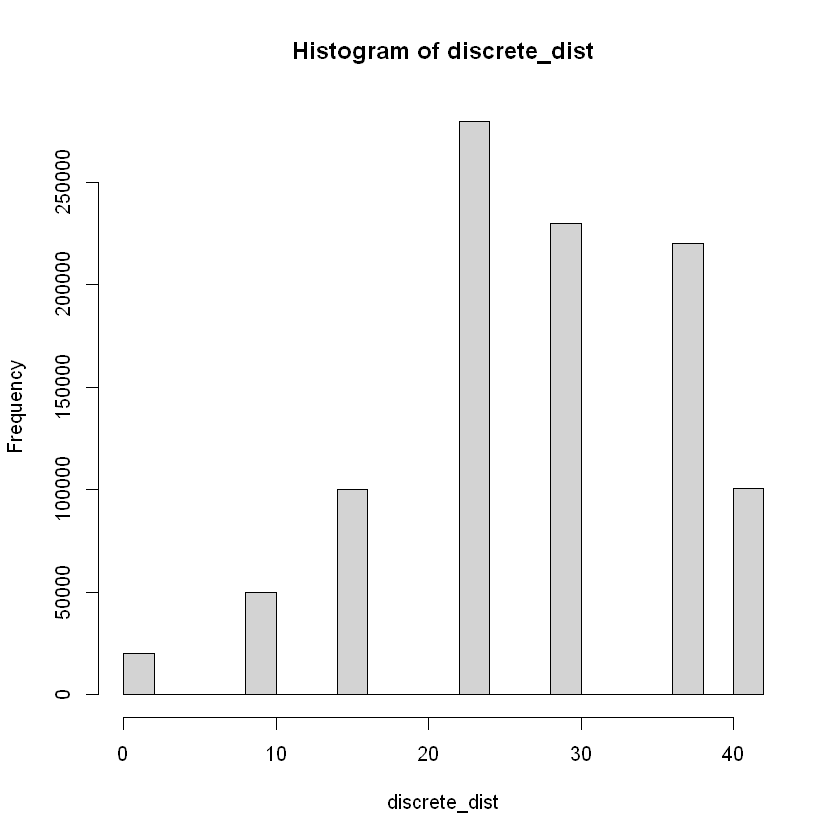

In [51]:
hist(discrete_dist)

Шукаємо математичне сподівання та дисперсію

Variance for this disctere distribution:  96.62186 
Expected value:  27.68795forPlot
 [1,10) [10,15) [15,23) [23,29) [29,38) [38,42) [42,43) 
  20234   49825  100279  279715  229728  219869  100350 


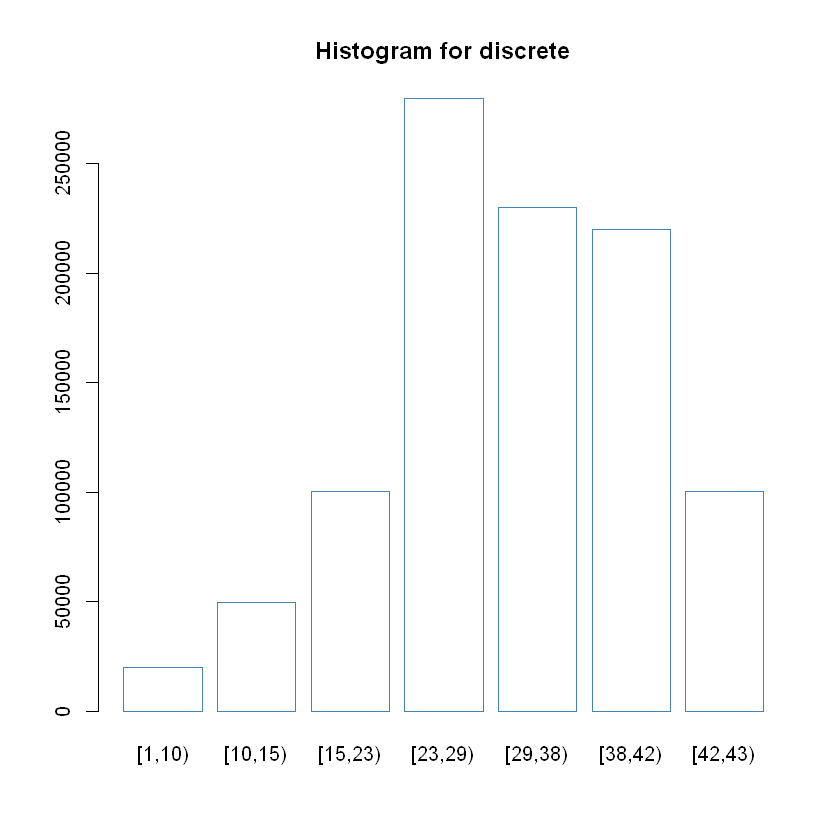

In [52]:
varDiscDest <- var(discrete_dist)

MathExpectation <- mean(discrete_dist)

cat("Variance for this disctere distribution: ",varDiscDest,"\nExpected value: ", MathExpectation)
forPlot <- forPlot <- cut(discrete_dist, c(xi42,43), right = FALSE)
barplot(table(forPlot),main="Histogram for discrete", col = "white", border = "steelblue" )
print(table(forPlot))
# hist(discrete_dist, main="Histogram for discrete", col = "white", border = "steelblue", breaks = xi42)

Тепер створюємо частотну таблицю


In [53]:
freq2 <- c()
for (i in xi42){
  suB2 <-0
  for (k in discrete_dist){
    if (i==k){suB2 <- suB2+1 }
  }
  freq2 <- c(freq2,suB2)
}
print(freq2)

freq2_comp <- freq2/n

table42 <- cbind("|",xi42,"|", freq2, "|", freq2_comp,"|")
print(table42, quote=FALSE)

[1]  20234  49825 100279 279715 229728 219869 100350
       xi42   freq2    freq2_comp  
[1,] | 1    | 20234  | 0.020234   |
[2,] | 10   | 49825  | 0.049825   |
[3,] | 15   | 100279 | 0.100279   |
[4,] | 23   | 279715 | 0.279715   |
[5,] | 29   | 229728 | 0.229728   |
[6,] | 38   | 219869 | 0.219869   |
[7,] | 42   | 100350 | 0.10035    |


Тепер перевіряємо гіпотезу, що цей розподіл нормальний

Перш за все необхідно знайти середньоквадратичне відхилення вибірки

In [54]:
stand_dev42 <- sqrt(varDiscDest)
cat("Standart deviation: ", stand_dev42, "\nExpected value: ", MathExpectation)

Standart deviation:  9.829642 
Expected value:  27.68795

Застосуємо формулу для знаходження Х^2 спостережувальне, перевіримо чи гіпотеза правильна

$$ \sum_{n=1}^{\infty}(\dfrac{(n_i-n*p_i)^2}{n*p_i})  $$

In [55]:
k <- sum(((freq2-n*pi42)^2)/n*pi42)
kth <- 9.5

if (k<kth){
  cat("Hyposesys about normal distribution IS TRUE")
}else{cat("That`s not normal distribution")}

Hyposesys about normal distribution IS TRUE

# 3. Змоделювати неперервні випадкові величини, що мають закони розподілу нормальний (гауссовий), Вейбулла, Релея, логнормальний, Коші. Параметри розподілів задати в режимі діалогу. Побудувати графіки отриманих реалізацій.

## Нормальний(Гауссовий) розподіл

Expected value of the distribution:
 0.002500979 
 Varience of this distribution:
 0.9988159

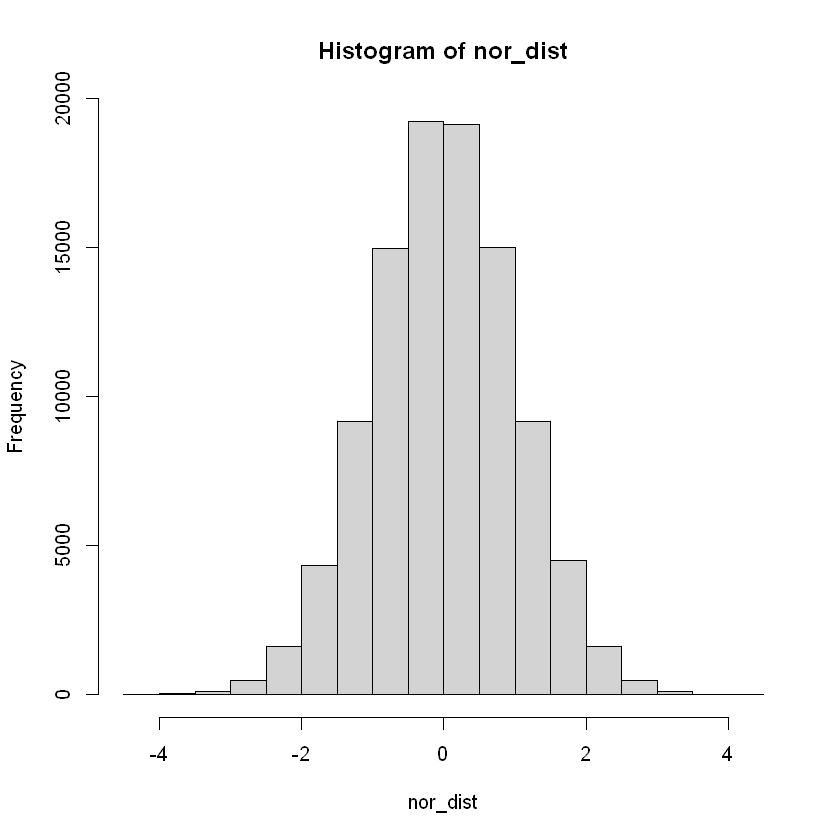

In [56]:
n<-100000
nor_dist <- rnorm(n)
Exp_val_norm<- mean(nor_dist)
var_norm <- var(nor_dist)
hist(nor_dist)
cat("Expected value of the distribution:\n",Exp_val_norm,"\n Varience of this distribution:\n", var_norm)

Shape parameter for Weibull distribution is:  6Expected value of the distribution:
 0.9272484 
 Varience of this distribution:
 0.03211412

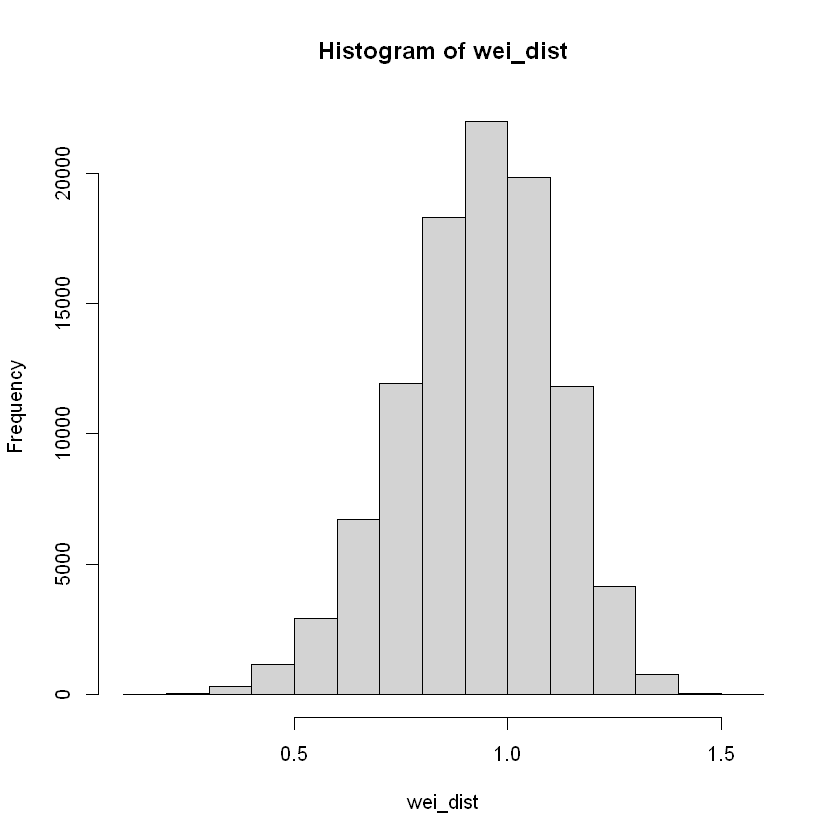

In [57]:
shape<- as.numeric(readline("Shape parameter for Weibull distribution is: "))
cat('Shape parameter for Weibull distribution is: ',shape )
wei_dist <- rweibull(n,shape)

Exp_val_wei<- mean(wei_dist)
var_wei <- var(wei_dist)
hist(wei_dist)
cat("Expected value of the distribution:\n",Exp_val_wei,"\n Varience of this distribution:\n", var_wei)

## Релея

Scale parameter for Rayleigh distribution is:  7
Expected value of the distribution:
 8.779919 
 Varience of this distribution:
 21.02366

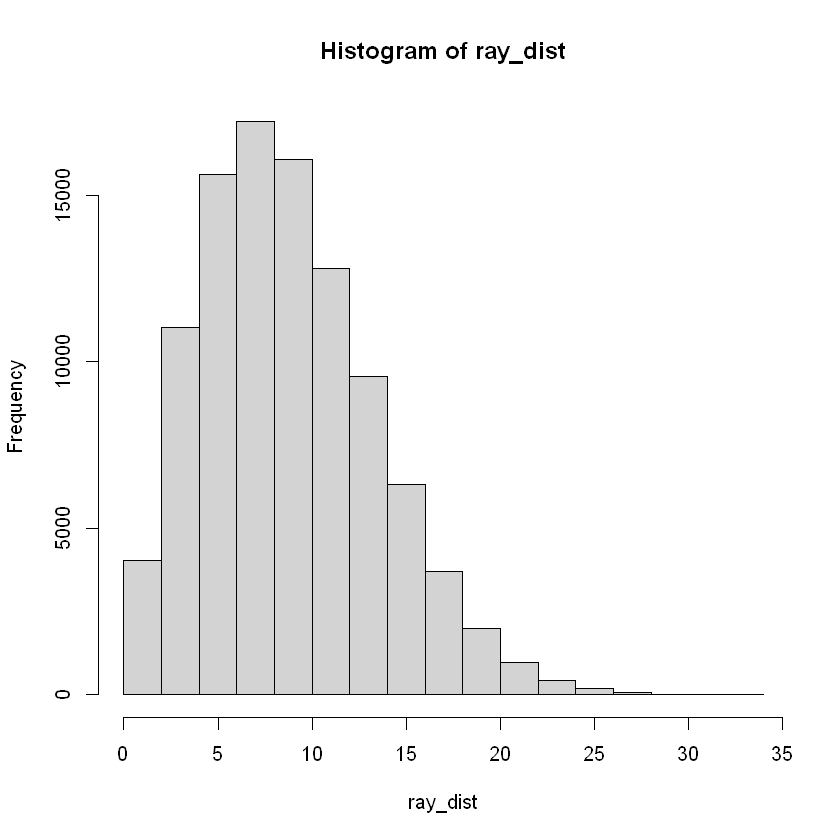

In [58]:
library(VGAM)
scale <- as.numeric(readline("Scale parameter for Rayleigh distribution is: "))
cat("Scale parameter for Rayleigh distribution is: ",scale)
ray_dist <- rrayleigh(n,scale)
Exp_val_ray<- mean(ray_dist)
var_ray <- var(ray_dist)
hist(ray_dist)
cat("\nExpected value of the distribution:\n",Exp_val_ray,"\n Varience of this distribution:\n", var_ray)

## Логонормальний

Mean for LogNorm distribution is:  7 
Standart deviation for LogNorm distribution is:  8Expected value of the distribution:
 2.049003e+14 
 Varience of this distribution:
 1.715703e+33

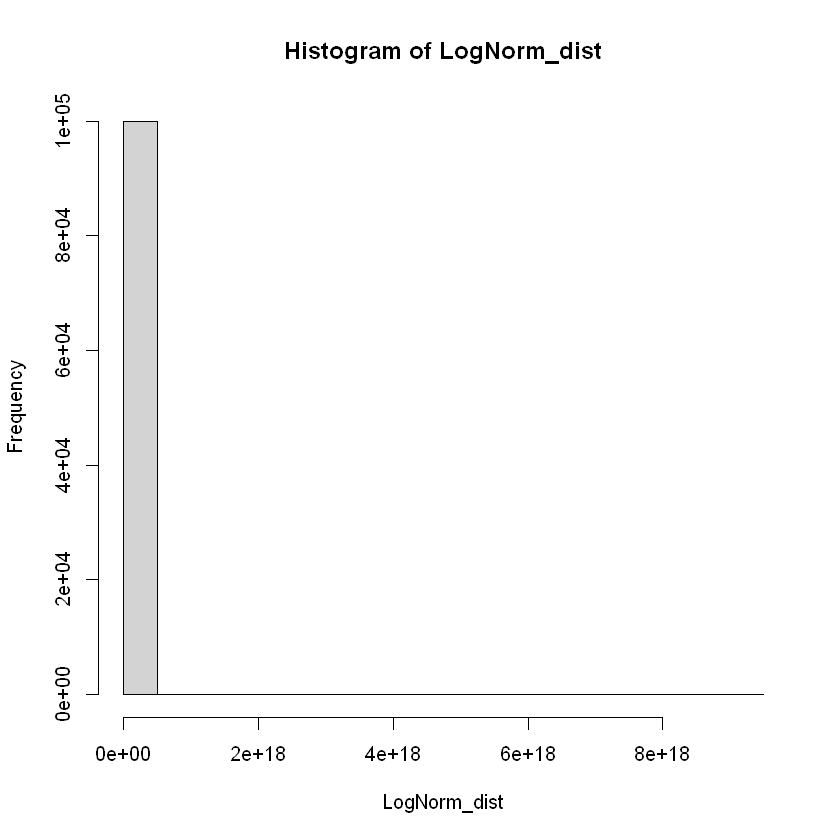

In [59]:

meanl <- as.numeric(readline("Mean for LogNorm distribution is: "))
sdl <- as.numeric(readline("Standart deviation for LogNorm distribution is: "))
cat("Mean for LogNorm distribution is: ",meanl,"\nStandart deviation for LogNorm distribution is: ",sdl)
LogNorm_dist <- rlnorm(n,meanl,sdl)
Exp_val_LogNorm<- mean(LogNorm_dist)
var_LogNorm <- var(LogNorm_dist)
hist(LogNorm_dist)
cat("Expected value of the distribution:\n",Exp_val_LogNorm,"\n Varience of this distribution:\n", var_LogNorm)

## Коші

Location parametr for cauchy distribution is:  9 
Scale parametr for cauchy distribution is:  10Expected value of the distribution:
 13.50409 
 Varience of this distribution:
 2995317

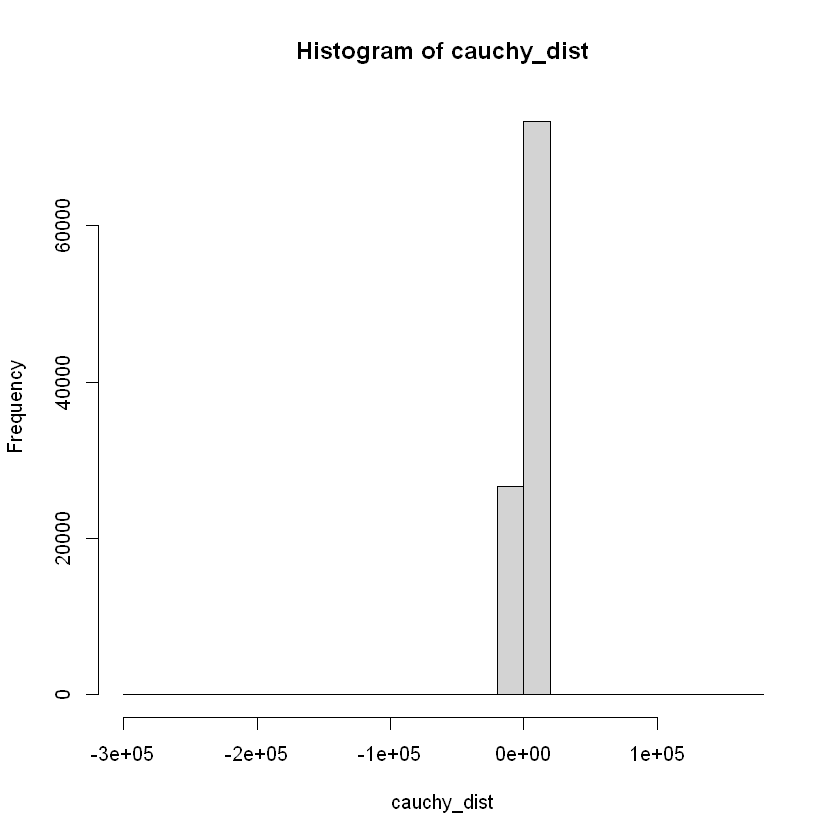

In [60]:

locationc <- as.numeric(readline("Location parametr for cauchy distribution is: "))
scalec <- as.numeric(readline("Scale parametr for cauchy distribution is: "))
cat("Location parametr for cauchy distribution is: ",locationc,"\nScale parametr for cauchy distribution is: ",scalec)
cauchy_dist <- rcauchy(n,locationc,scalec)
Exp_val_cauchy<- mean(cauchy_dist)
var_cauchy <- var(cauchy_dist)
hist(cauchy_dist)
cat("Expected value of the distribution:\n",Exp_val_cauchy,"\n Varience of this distribution:\n", var_cauchy)

# 4. Обчислити інтеграли методом Монте-Карло
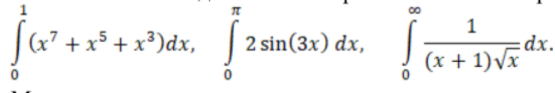

In [61]:
a1<-0
b1<-1
I1 <- print((b1-a1)*sum(sapply(dots,function (x) x^7+x^5+x^3 ))/n)

a2<-0
b2<-pi
newdots <- runif(n,a2,b2)
I2 <- print((b2-a2)*sum(sapply(newdots,function (x) 2*sin(3*x) ))/n)

a3<-0
b3<-2001
newwdots <- runif(n,a3,b3)
I3 <- print((sum(sapply(newwdots, function (x) 1/((x+1)*sqrt(x)) ))*(b3-a3)/n))

[1] 5.41201
[1] 1.345258
[1] 3.152863


# 5. Змоделювати випадкову двійкову послідовність за формулою

Генеруємо бінарну послідовність та епміричний закон розподілу

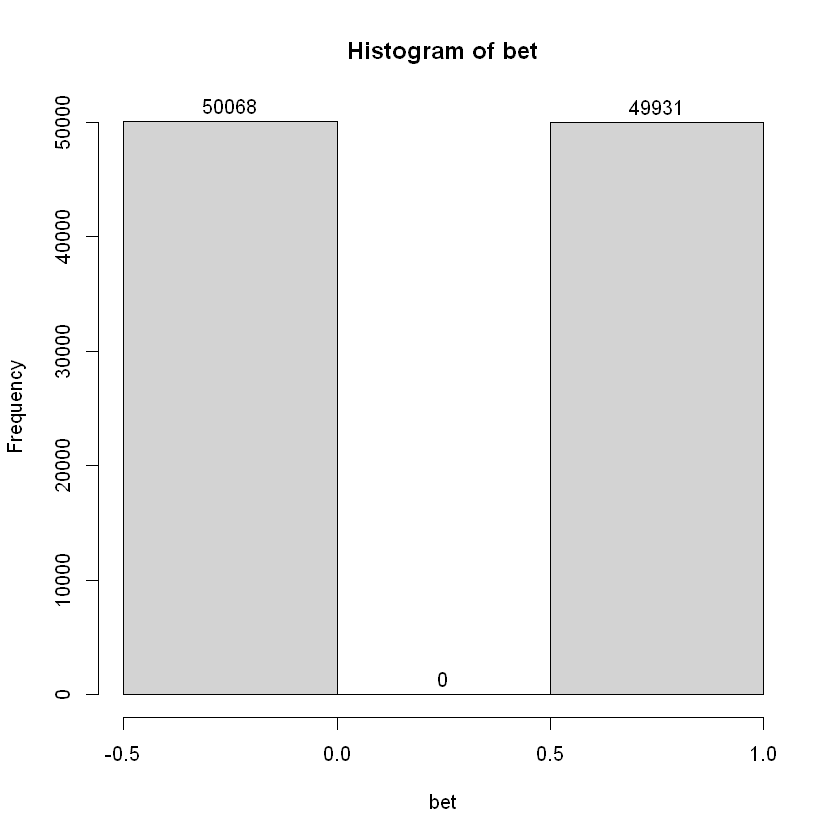

In [62]:
bet <- c()
dots <- rnorm(n)
bet<- sapply(c(1:n), function(x) +(dots[x+1]<dots[x]))
hist(bet, labels = TRUE, breaks = c(-0.5,0,0.5,1))

# 6. Задано N кіл (відомі координати центра та радіус). Перевірити, чи мають ці кола спільні точки. Знайти площу фігури, що утворилась в результаті їх перетину.

Спочатку згенеруємо та виведемо усі кола. У ході програми генерується задана кількість кіл з випадковим радіусом та кординатами(для зручності введене обмеження координат, щоб ймовірність перетину кіл збільшилася)

Table of circles
       xs     ys     rs   
[1,] | 0.5  | 1.5  | 2.5 |
[2,] | -0.5 | -1.5 | 2.5 |
[3,] | 1.5  | -0.5 | 1.5 |


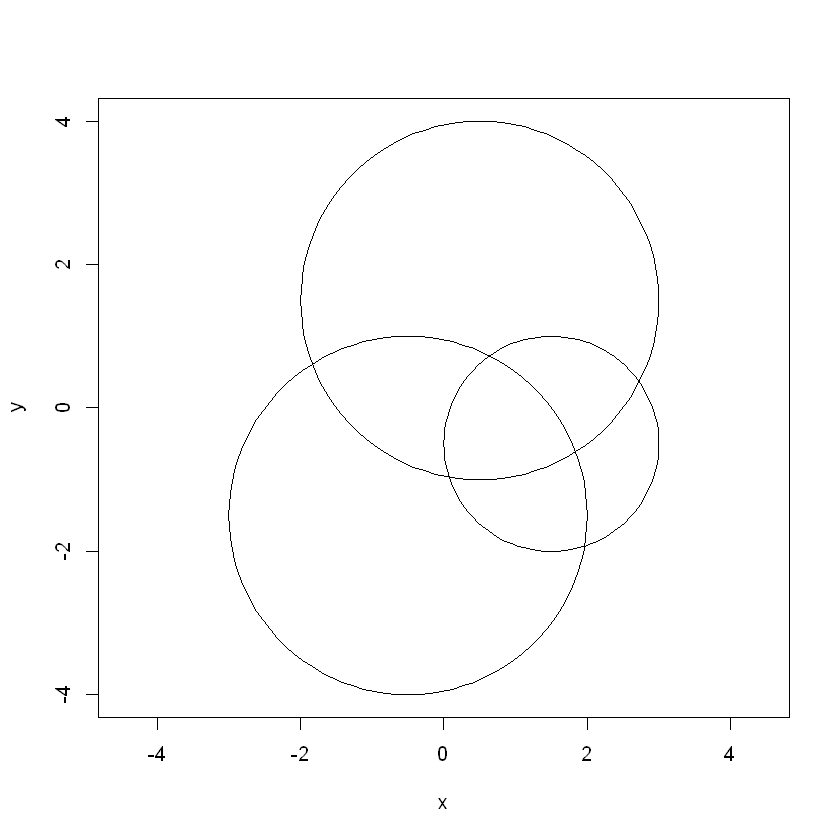

In [63]:
library(smacpod)
library(plotrix)
n<-as.numeric(readline("Enter the amount of cirles"))
g<-n/2
# plot(0,0,type = "n",xlim = c(-2*n,2*n), ylim = c(-2*n,2*n))
xs <- sample(-g:g,size=n)
ys <- sample(-g:g,size=n)
rs <- sample(g:n, size=n, replace = TRUE)
cat('Table of circles\n')
for_t <- print(cbind('|',xs,'|',ys,'|',rs,'|'), quote=FALSE)
cords <- data.frame(xs,ys)
circles.plot(cords,rs)

Функція для перевірки чи усі значення у векторі/матриці - TRUE

In [64]:
check<- function (x){
  for (i in x){
    if (i == FALSE){
      return (FALSE)}
  }
  return (TRUE)
}


Тепер необхідно перевірити чи ці кола взагалі перетинаються

In [65]:
do_intersec <- check(circles.intersect(cords,rs))
if(check(circles.intersect(cords,rs))==FALSE){cat("Circles don`t intersect")}else{cat("Calculating intersection area")}

Calculating intersection area

Шукаємо коло з мінімальним радіусом, щоб отписати навколо прямокутник.

In [66]:
v<-min(rs)
find_small <- which(rs==v)[1]
xss<- xs[find_small]
yss <- ys[find_small]

Якщо перетин існує, то генеруємо мільйон точок у квадраті, описаному навколо найменшого кола. Потім перевіряємо які точки з цієї множини належать усім колам, тобто належать перетину, робимо відношення кількості точок у перетині до кількості точок загалом у квадраті. Множимо це на площу квадрату та отримуємо загальну площу перетину.
Виводимо графік з замальованим перетином.

The area of intersection is:  4.309074

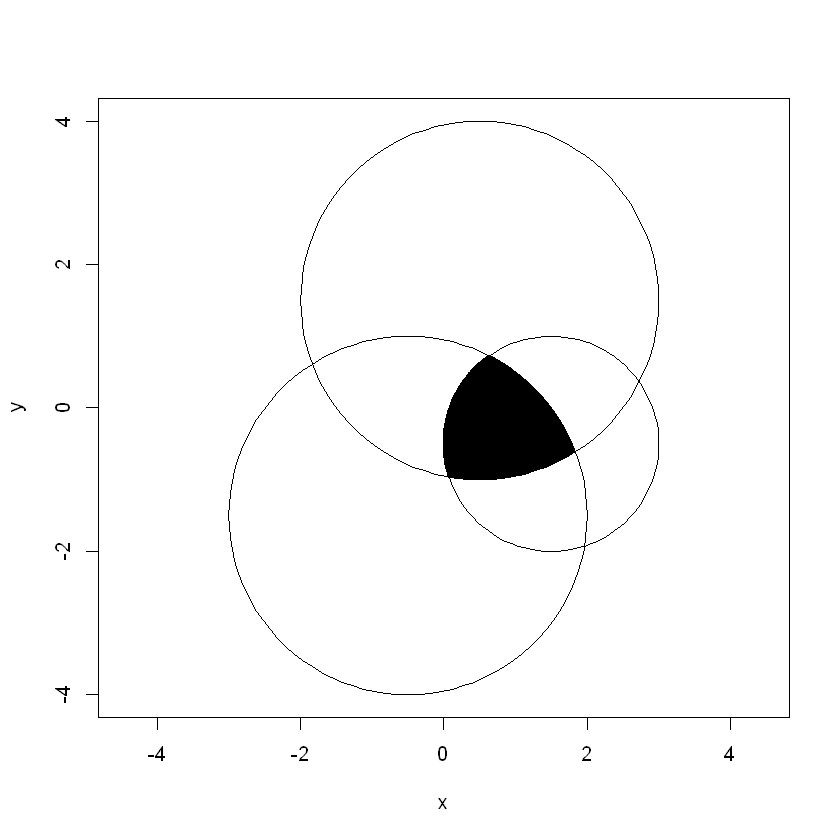

In [67]:

if (do_intersec==TRUE){

  newn<-1000000
  dots_for_6 <- matrix(c(runif(newn,(xss-v),(xss+v)),runif(newn,(yss-v),(yss+v))), nrow=newn)
  kz <- sapply(1:newn, function(i) if(check(sapply(1:n,
                                                   function(k) sqrt((dots_for_6[i,1]-xs[k])^2 + (dots_for_6[i,2]-ys[k])^2)<rs[k]))){dots_for_6[i,1:2]})
  dots_for_xy<-t(matrix(unlist(Filter(Negate(is.null),kz)),nrow=2))
  circles.plot(cords,rs)
  points(dots_for_xy,pch = 1, cex = 0.01)

  area<-(((2*v)^2)*length(dots_for_xy))/newn
  cat("The area of intersection is: ",area)}

# 7. Задано N сфер (відомі координати центра та радіус). Перевірити, чи мають ці сфери спільні точки. Знайти об’єм фігури, що утворилась в результаті їх перетину.

Спочатку згенеруємо координати для наших сфер: x,y,z та радіуси. Виводимо таблицю та малюєио графік. Оскільки програма важка для Jupyter notebook я не виводжу графік тут, а додаю зображення 3д візуалізації сфер при n=4, щоб наочно показати як це має виглядати. Усі функції виводу графіків закоментовані.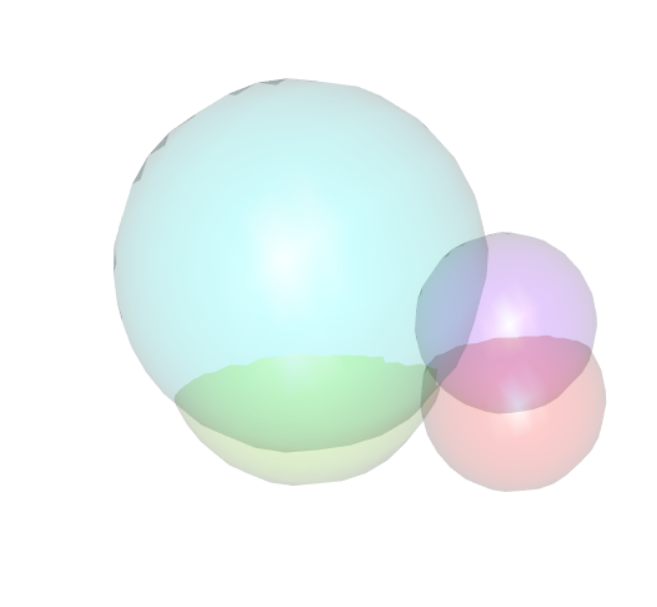

In [74]:
# library(rgl)
n<-as.numeric(readline("Enter the amount of spheres"))
g<-n/2
xs <- sample(-g:g,size=n)
ys <- sample(-g:g,size=n)
zs <- sample(-g:g,size=n)
rs <- sample(g:n, size=n, replace = TRUE)
cat('Table of spheres\n')
for_t <- print(cbind('|',xs,'|',ys,'|',zs,'|',rs,'|'), quote=FALSE)
cords <- data.frame(xs,ys,zs)
#open3d()
#material3d(1,alpha=0.2)
#spheres3d(xs,ys,zs,rs,color = rainbow(n))

Table of spheres
       xs     ys     zs     rs   
[1,] | -0.5 | -0.5 | 1.5  | 1.5 |
[2,] | 0.5  | 1.5  | -1.5 | 2.5 |
[3,] | -1.5 | -1.5 | 0.5  | 2.5 |


    Знаходимо сферу з найменшим радіусом та описуємо куб.

In [75]:
v<-min(rs)
find_small <- which(rs==v)[1]
xss<- xs[find_small]
yss <- ys[find_small]
zss <- zs[find_small]

Також додаємоо функцію для перевірки чи усі значення у списку - True

In [76]:
check<- function (x){
  for (i in x){
    if (i == FALSE){
      return (FALSE)}
  }
  return (TRUE)
}

Тепер генеруємо 100 тисяч точок та берігаємо лише ті, які належать перетину. Множимо об'єм куба на відношення (кількість точок у перетині)/(кількість точок у кубі) та отримуємо об'єм перетину. 

# --->
Додаю також фото перетину для обраного випадку(чорний колір). У разі, якщо перетину немає - програма про це каже. Для обраного випадку перетин дорівнював 0.242112 
Координати сфер       
(x, y, z, r)  --
(2 , 1, -1, 2)--
(-1 , -2, -1, 3)--
(-2 , -1, 2, 4)--
(1 , 2, 0, 2)
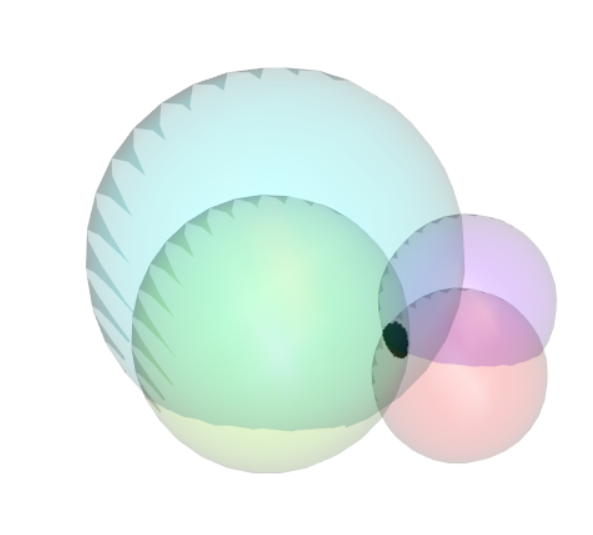

In [77]:
newn<-1000000
dots_for_6 <- matrix(c(runif(newn,(xss-v),(xss+v)),runif(newn,(yss-v),(yss+v)),runif(newn,(zss-v),(zss+v))), ncol=3)
kz <- sapply(1:newn, function(i) if(check(sapply(1:n,
                                        function(k) sqrt((dots_for_6[i,1]-xs[k])^2 + (dots_for_6[i,2]-ys[k])^2+(dots_for_6[i,3]-zs[k])^2)<rs[k]))){dots_for_6[i,1:3]})

full<- is.null(unlist(Filter(Negate(is.null),kz)))
if (full){
  cat("This spheres have no intersection")
}else{
  dots_for_xyz<-t(matrix(unlist(Filter(Negate(is.null),kz)),nrow=3))
  #spheres3d(xs,ys,zs,rs,color = rainbow(n))
  #points3d(dots_for_xyz[,1],dots_for_xyz[,2],dots_for_xyz[,3], color="black", alpha=1)

  volume<-(((2*v)^3)*length(dots_for_xyz))/newn
  cat("The volume of intersection is: ",volume)

}


The volume of intersection is:  0.508113